## Sumário

[Implementação](#)

[Definição de Topologia da Rede](#)

[Definir otimizador, função custo e modo do treinamento](#)

[Referências](#)

## Imports

In [67]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

## Implementação

### Leitura, visualização e pré-processamento do dataset
Ao utilizar Redes Neurais para imagens, cada entrada é um pixel. Dessa forma, após a leitura do dataset, precisa-se descobrir as dimensões da imagem, a quantidade de instâncias, quantas classes e entradas são necessárias para o problema.

Feito isso, algumas técnicas de pré-processamento devem ser utilizadas para melhores resultados, dentre eles converter a imagem para tons de cinza e normalizar.

((60000, 784), (60000,), (10000, 784), (10000,))

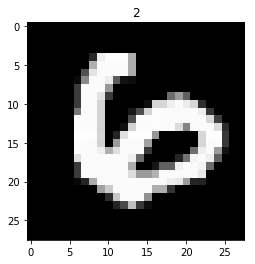

In [77]:
# carrega dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[9000], cmap=plt.get_cmap('gray'))
plt.title(y_train[5])

# normalizando entrada
x_train, x_test = x_train.reshape(-1,784)/255.0, x_test.reshape(-1,784)/255.0

x_train.shape, y_train.shape, x_test.shape, y_test.shape

### Conversão do array de predições Y

Baseado no número de classes do problema, represente a saída como one-hot encoding.

In [87]:
# numero de classes
D_out = 10
# one hot encoding
y_train_oh, y_test_oh = to_categorical(y_train, D_out), to_categorical(y_test, D_out)

y_train_oh.shape, y_test_oh.shape

((60000, 10), (10000, 10))

### Definição de Topologia da Rede
Mostre as três arquiteturas que serão utilizadas para resolver o problema. As arquiteturas devem ser simples de forma a retornar bons resultados com a menor quantidade necessária de neurônios e camadas. As três arquiteturas devem variar apenas quanto ao número de neurônios e camadas (incluindo regularização). Baseado nisso, explique:

* Quantos neurônios serão utilizados em cada camada?
* Quantas camadas serão utilizadas?
* É necessário utilizar regularização? Se sim explique a técnica que foi utilizada e o impacto nos resultados
* Qual função de ativação será utilizada? Escolha duas funções de ativação e explique os resultados obtidos

#### 1.1 Arquitetura

In [119]:
classifier = Sequential()
classifier.add(Dense(units=20, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=20, activation='relu'))
classifier.add(Dense(D_out, activation='sigmoid'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_40 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [120]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
history = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))
history.history.keys()

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.4392 - acc: 0.8768 - val_loss: 0.2490 - val_acc: 0.9268
Epoch 2/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.2442 - acc: 0.9292 - val_loss: 0.2105 - val_acc: 0.9386
Epoch 3/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.2067 - acc: 0.9405 - val_loss: 0.1888 - val_acc: 0.9461
Epoch 4/30
60000/60000 [==============================] - 7s 111us/step - loss: 0.1823 - acc: 0.9470 - val_loss: 0.1913 - val_acc: 0.9433
Epoch 5/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.1636 - acc: 0.9515 - val_loss: 0.1710 - val_acc: 0.9504
Epoch 6/30
60000/60000 [==============================] - 7s 125us/step - loss: 0.1501 - acc: 0.9558 - val_loss: 0.1500 - val_acc: 0.9564
Epoch 7/30
60000/60000 [==============================] - 6s 105us/step - loss: 0.1379 - acc: 0.9585 - val_loss: 0.1466 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5,0,'epoch')

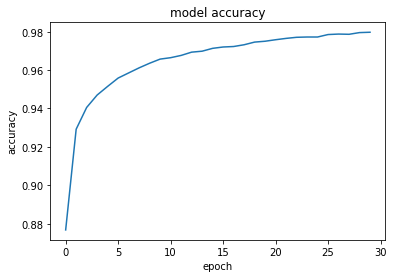

In [123]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

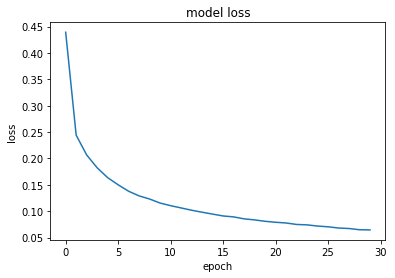

In [124]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')